In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [2]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([1.95656488, 1.13984768, 1.30985423, 2.55656227, 2.02176111,
       2.59880291, 1.80092671, 2.13019606, 1.56652158, 2.28805231])

In [3]:
?sts.norm.cdf

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [3]:
norm_rv.cdf(3)

0.97724986805182079

Построим график функции распределения:

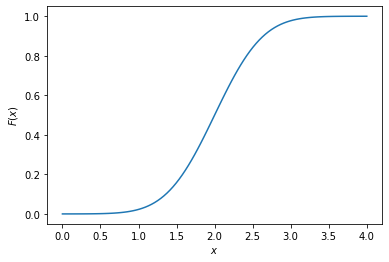

In [4]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [5]:
norm_rv.pdf(3)

0.10798193302637613

Построим график функции плотности вероятности:

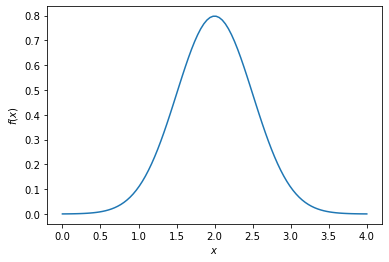

In [7]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [8]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([1.04124695, 1.37835445, 3.64940639, 1.48255843, 2.55595016,
       3.06186151, 3.12643224, 3.27500883, 2.46518416, 1.65803528])

А так — вычислять значения функций распределения и плотностей:

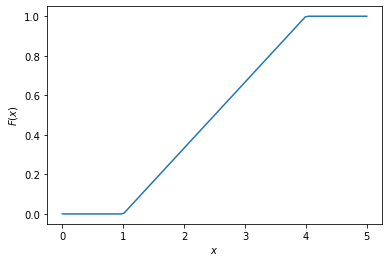

In [9]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

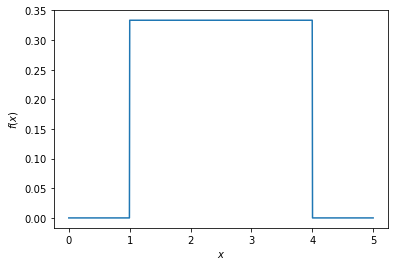

In [10]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [11]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [12]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([15, 15, 11, 15, 15, 12, 11, 14, 11, 12])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

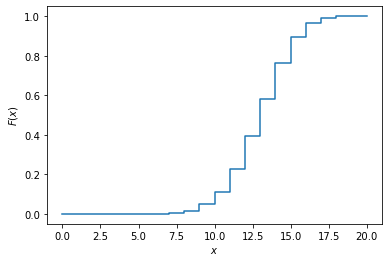

In [13]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

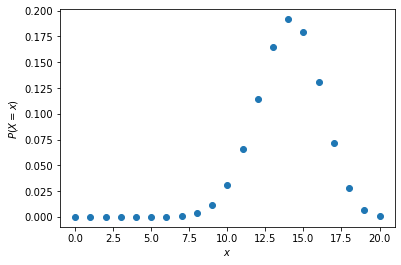

In [14]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.show()

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

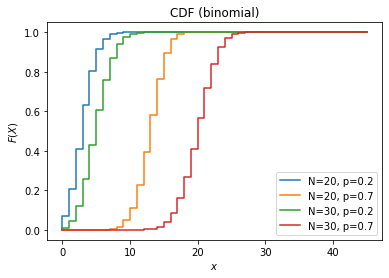

In [16]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label=f'N={N}, p={p}')
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')
plt.show()

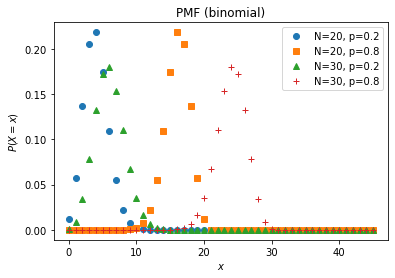

In [18]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label=f'N={N}, p={p}')
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.show()

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [19]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([7, 4, 5, 6, 7, 3, 9, 6, 7, 6])

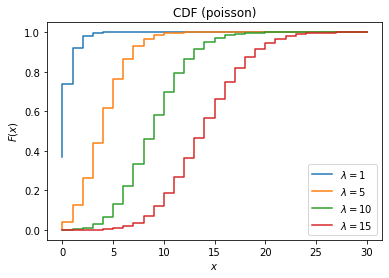

In [20]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

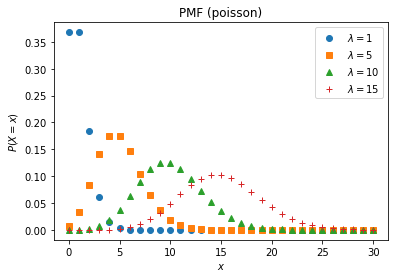

In [21]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.show()

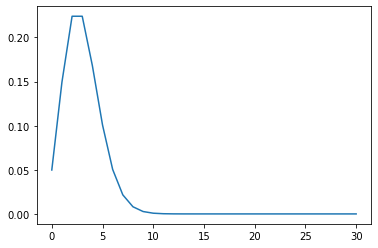

In [10]:
x = np.linspace(0, 30, 31)
l = 3 
rv = sts.poisson(l)
pmf = rv.pmf(x)
plt.plot(x, pmf)
plt.show()

In [2]:
x = np.linspace(0, 30, 31)
l = 3 
rv = sts.poisson(l)

accum_prob = 0
for x in [0, 1, 2, 3, 4]:
    accum_prob += rv.pmf(x)
1 - accum_prob

0.18473675547622792

In [14]:
pmf

array([4.97870684e-02, 1.49361205e-01, 2.24041808e-01, 2.24041808e-01,
       1.68031356e-01, 1.00818813e-01, 5.04094067e-02, 2.16040315e-02,
       8.10151179e-03, 2.70050393e-03, 8.10151179e-04, 2.20950322e-04,
       5.52375804e-05, 1.27471339e-05, 2.73152870e-06, 5.46305740e-07,
       1.02432326e-07, 1.80762929e-08, 3.01271548e-09, 4.75691918e-10,
       7.13537877e-11, 1.01933982e-11, 1.39000885e-12, 1.81305502e-13,
       2.26631878e-14, 2.71958253e-15, 3.13797985e-16, 3.48664428e-17,
       3.73569029e-18, 3.86450720e-19, 3.86450720e-20])

In [15]:
np.interp(0, x, pmf)

0.049787068367863944

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [22]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([12,  5,  5, 12, 12,  5, 12,  5, 12,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы:

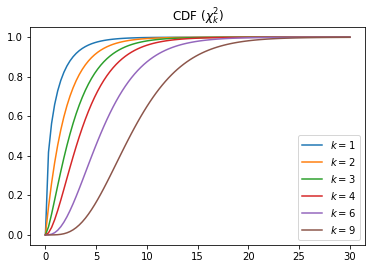

In [23]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")
plt.show()

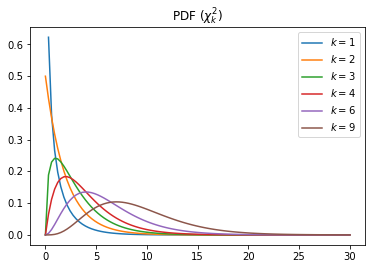

In [24]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")
plt.show()

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html